In [104]:
# https://en.wikipedia.org/wiki/Mandelbrot_set

In [6]:
%load_ext Cython

import time
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML

MAX_ITER = 50
SIZE = 512
MAX_ABS = 2

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [7]:
%%cython
import numpy as np

cdef int mandelbrot_sequence(double x,double y,int max_iter, double max_abs):
    cdef complex c = complex(x, y)
    cdef complex z = 0
    cdef int n = 0
    while np.abs(z) < max_abs and n < max_iter:
        z = z ** 2 + c
        n += 1
    return n

def mandelbrot_set(int max_iter, int size, double max_abs) -> double[:, :]:
    cdef int i
    cdef int j
    cdef double[:, :] image = np.zeros((size // 2, size))
    cdef Py_ssize_t y_max = image.shape[0]
    cdef Py_ssize_t x_max = image.shape[1]
    for i in range(y_max):
        for j in range(x_max):
            image[i, j] = mandelbrot_sequence((j - .75 * size) * 4 / size, 
                                              (i - .25 * size) * 4 / size,
                                              max_iter, max_abs)
    return image

74.47402286529541


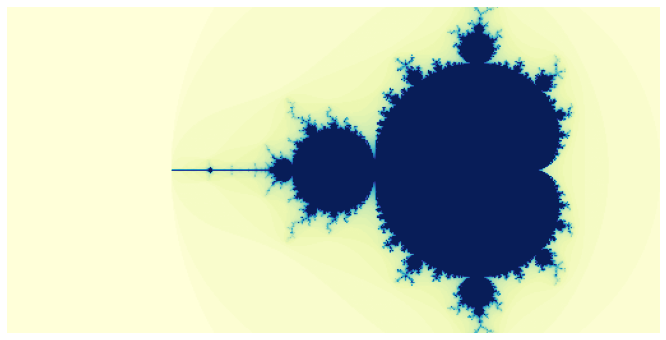

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')
artists = []
t = time.time()
for i in range(1, MAX_ITER):
    print(f"{i+1} / {MAX_ITER}", end="\r")
    image = mandelbrot_set(i, SIZE, MAX_ABS)
    artists.append([ax.imshow(image, cmap='YlGnBu')])
print(time.time() - t)

In [9]:
animation = ArtistAnimation(
    fig,
    artists,
    repeat=True,
    interval=100
)
HTML(animation.to_jshtml())

In [10]:
animation.save("mandelbrot_set.gif", writer="imagemagick")